# Bench the Alep model in parallel

In [1]:
%run benchmark.ipynb

## Parallel computing interface

In [2]:
from IPython.parallel import Client

In [3]:
c = Client()
v = c.load_balanced_view()

## Benchmark for various numbers of plants, phyto-elements by leaf, initial number of lesions by leaf

In [4]:
def parallel_bench(plant, phy, les):
    repeat = 1
    from IPython.kernel.zmq.datapub import publish_data
    times, gs=zip(*[measure(plant, phy, les) for i in range(repeat)])
    _time =min(times)
    print _time
    publish_data(dict(plant=plant, phytomer=phy, lesion=les, time=_time))


In [5]:
# results
async_results = []
%px %run benchmark.ipynb

In [6]:
for les in (3,):
    for plant in (3,):
        for phy in (1,):
            ar = v.apply_async(parallel_bench, plant, phy, les)
            async_results.append(ar)
c.wait(async_results)
results = [ar.data for ar in async_results]
merge(results)

In [144]:
results = [ar.data for ar in async_results]
results = [r for r in results if r]
results
del results[-2]
results
merge(results)


In [7]:
df = pd.DataFrame.from_csv('bench.txt',sep=',',index_col=None)
df

plant  phytomer  lesion         time
0       1         1       1    52.616385
1       2         1       1   151.110308
2       1         1       2   185.221284
3       2         1       2   263.577027
4       1         1       3   196.352517
5       1         1       4   217.332566
6       2         1       4   376.497868
7       1         1       5   274.339585
8       2         1       5   483.802772
9       1         1      10   362.732985
10      2         1      10   745.901678
11      3         1       1   699.892657
12      4         1       1   962.015559
13      5         1       1  1116.281023
14      3         1       2   917.889568
15      4         1       2  1124.708023
16      5         1       2  1710.204880
17      4         1       3  1562.571566
18      5         1       3  1855.431061
19      3         1       4  1401.032676
20      4         1       4  1652.886452
21      5         1       4  2152.609635
22      3         1       5  1643.862712
23      4         1       5  1721.604758
24      5         1       5  1954.623514
25      3         1      10  1668.678012
26      4         1      10  1721.181873
27      5         1      10  1887.445377
28     10         1       1  2482.067981
29     20         1       1  4080.104507
30     10         1       2  2695.590068
31     20         1       2  4803.047765
32     10         1       3  3084.635194
33     20         1       3  4921.652758
34     10         1       4  3398.102003
35     20         1       4  6235.175777
36     10         1       5  3931.022879
37     20         1       5  6674.406327
38     10         1      10  4921.252146
39     20         1      10  8566.694451
40      1         4       3   679.455057
41      1         5       3   805.253789
42      1        10       3  1525.118101
43      1        20       3  2427.388019
44      2         1       3   444.018755
45      2        10       3  2192.697881
46      3         1       3   481.013149

[47 rows x 4 columns]

In [28]:
df = pd.DataFrame.from_csv('bench.txt',sep=',',index_col=None)

plant
1        Axes(0.125,0.125;0.775x0.775)
2        Axes(0.125,0.125;0.775x0.775)
3        Axes(0.125,0.125;0.775x0.775)
4        Axes(0.125,0.125;0.775x0.775)
5        Axes(0.125,0.125;0.775x0.775)
10       Axes(0.125,0.125;0.775x0.775)
20       Axes(0.125,0.125;0.775x0.775)
dtype: object

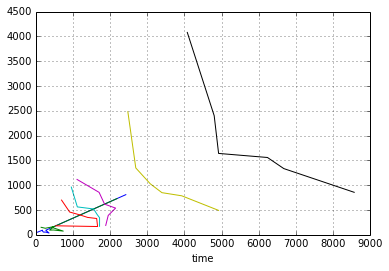

In [146]:
%matplotlib inline
df.tp= df.time/df.plant
df.tl= df.time/df.lesion
df['tp']=df.tp
df['tl']=df.tl

#df['ppl']=df.ppl
#df.sort('ppl')
#df.plot(x='ppl',y='time',kind='scatter')
df.groupby('plant').plot(x='time',y='tl')

In [103]:
#dfl = df.groupby('lesion')
#dfp = df.groupby('plant')
dfp1= df[df.lesion==1]
dfp1.time/dfp1.plant


0      52.616385
1      75.555154
12    233.297552
13    240.503890
14    223.256205
30    248.206798
31    204.005225
dtype: float64

In [129]:
%qtconsole

In [10]:
t,g=measure(1,1,1)

!!!!!!!!!!!WARNING !!!!!!!!!!: Septo3DSplash class is deprecated, and will be remove in future verions, use alinea.septo3d.dispersion.alep_interfaces instead


In [24]:
len(g.Trunk(1,Scale=4))

14

In [25]:
from sys import getsizeof
g.nbyte

64

In [26]:
8000./60

133.33333333333334

In [42]:
les=g.properties()['lesions']
g.nb_vertices(scale=4)

168

In [48]:
from pympler.asizeof import asizeof
mo=1024*1024
asizeof(g)*9.53674316*10**-7

23.164024343159838

In [44]:
mo=1024*1024

1048576

In [47]:
_*9.53674316*10**-7

0.999999999574016

In [ ]:
g, domain_area = adel_sample(nb_sect=nb_phyelts, d=1000, p=nb_plants)